In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("breast-cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.shape

(569, 32)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [9]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 32 columns]


In [11]:
df.drop(["id"],axis=1,inplace=True)

In [12]:
df[["radius_mean","perimeter_mean","area_mean"]]

,radius_mean,perimeter_mean,area_mean
0,17.99,122.80,1001.0
1,20.57,132.90,1326.0
2,19.69,130.00,1203.0
3,11.42,77.58,386.1
4,20.29,135.10,1297.0
...,...,...,...
564,21.56,142.00,1479.0
565,20.13,131.20,1261.0
566,16.60,108.30,858.1
567,20.60,140.10,1265.0


In [13]:
df.drop(["radius_mean","perimeter_mean"],axis=1,inplace=True)

In [14]:
df[["radius_worst","perimeter_worst","area_worst"]]

,radius_worst,perimeter_worst,area_worst
0,25.380,184.60,2019.0
1,24.990,158.80,1956.0
2,23.570,152.50,1709.0
3,14.910,98.87,567.7
4,22.540,152.20,1575.0
...,...,...,...
564,25.450,166.10,2027.0
565,23.690,155.00,1731.0
566,18.980,126.70,1124.0
567,25.740,184.60,1821.0


In [15]:
df.drop(["radius_worst","perimeter_worst"],axis=1,inplace=True)

In [16]:
df[["radius_se","perimeter_se","area_se"]]

,radius_se,perimeter_se,area_se
0,1.0950,8.589,153.40
1,0.5435,3.398,74.08
2,0.7456,4.585,94.03
3,0.4956,3.445,27.23
4,0.7572,5.438,94.44
...,...,...,...
564,1.1760,7.673,158.70
565,0.7655,5.203,99.04
566,0.4564,3.425,48.55
567,0.7260,5.772,86.22


In [17]:
df.drop(["radius_se","perimeter_se"],axis=1,inplace=True)

In [18]:
df.head()

,diagnosis,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,10.38,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.9053,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,17.77,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.7339,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,21.25,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7869,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,20.38,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1.1560,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,14.34,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7813,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
df.isnull().sum()

diagnosis                  0
texture_mean               0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
texture_se                 0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
texture_worst              0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

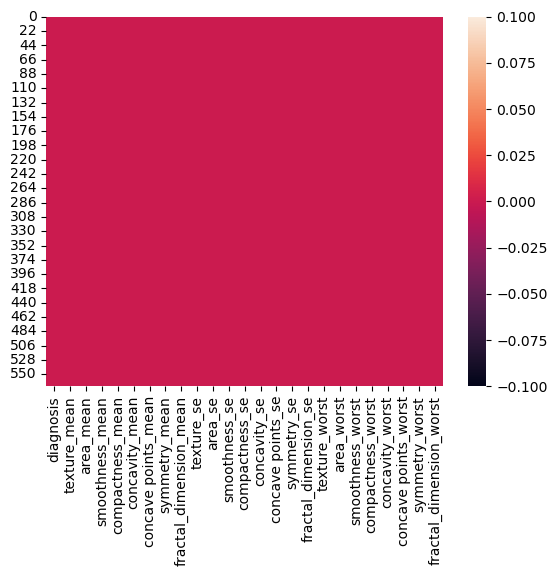

In [20]:
sns.heatmap(df.isnull())

In [21]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

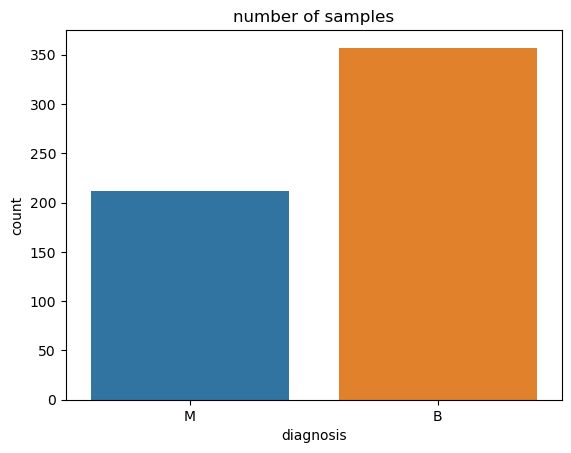

In [22]:
sns.countplot(x=df["diagnosis"],data=df)
plt.title("number of samples")
plt.show

In [23]:
le=LabelEncoder()
df["diagnosis"]=le.fit_transform(df["diagnosis"])

In [24]:
df["diagnosis"].head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

<Axes: >

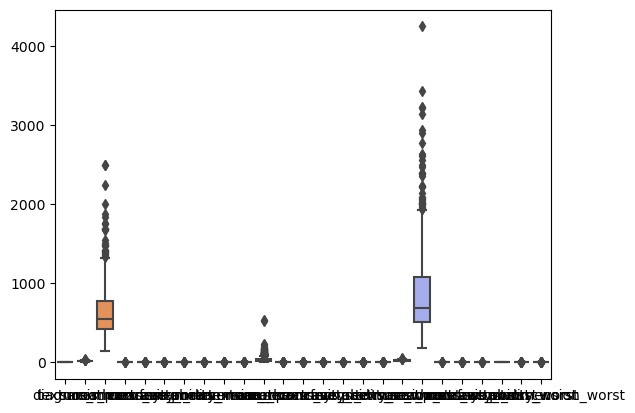

In [25]:
sns.boxplot(df)

<Axes: >

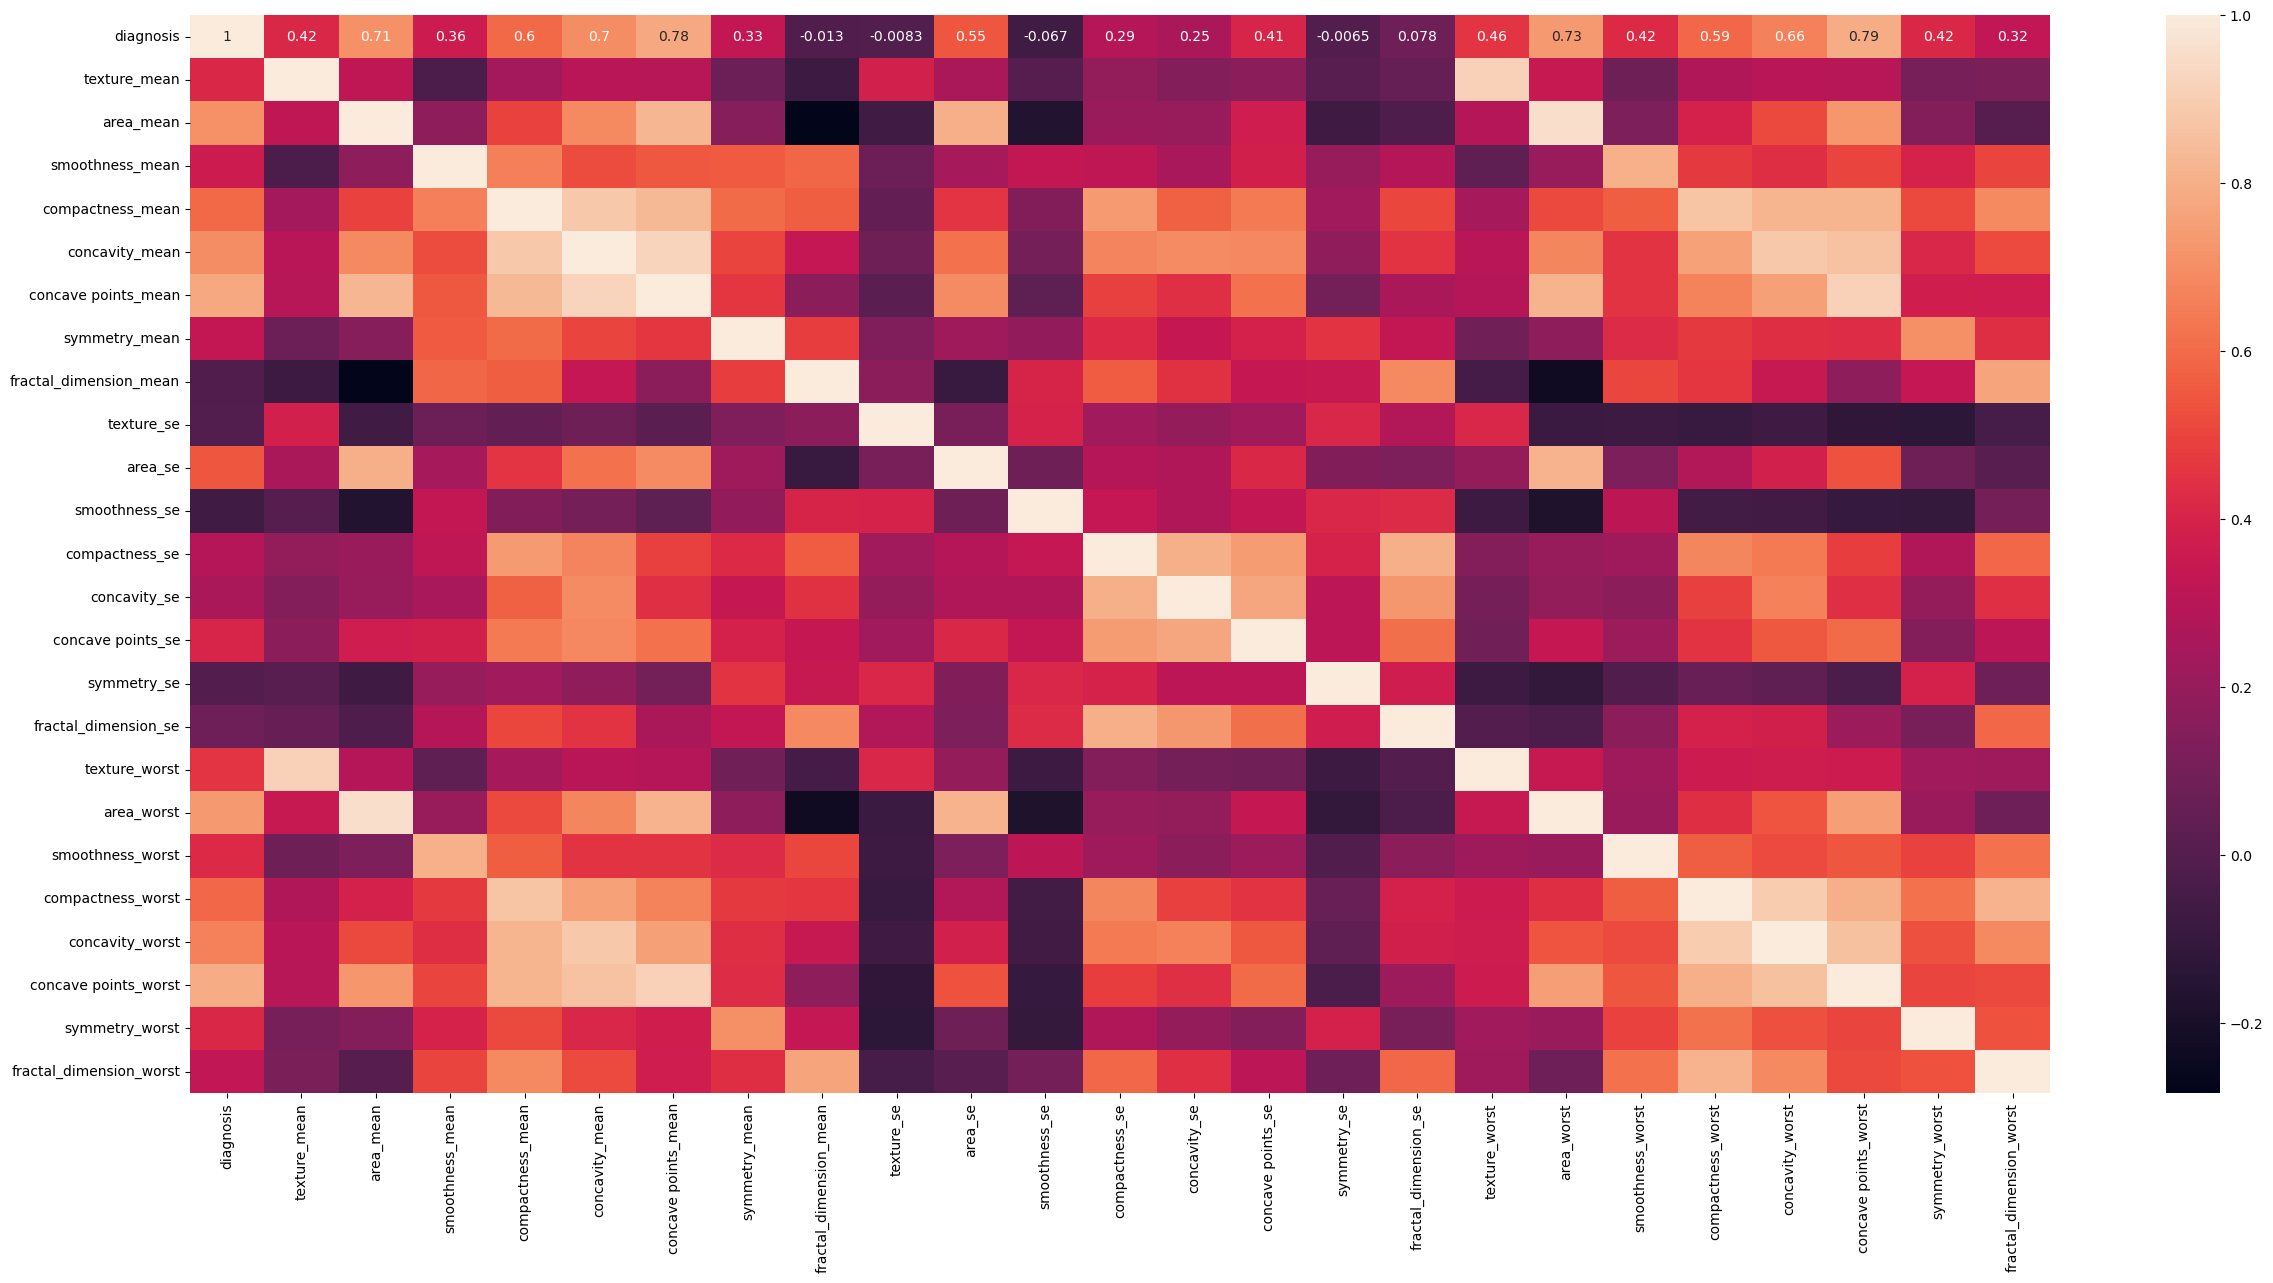

In [26]:
plt.figure(figsize=(30,14))
sns.heatmap(df.corr(),annot=True)

In [27]:
corr=df["smoothness_mean"].corr(df["smoothness_worst"])
print(f"correlation coefficient between this two column is {corr}")

correlation coefficient between this two column is 0.8053241954943632


In [28]:
corr=df["symmetry_mean"].corr(df["symmetry_worst"])
print(f"correlation coefficient between this two column is {corr}")

correlation coefficient between this two column is 0.6998257976437305


In [29]:
corr=df["concave points_mean"].corr(df["concave points_worst"])
print(f"correlation coefficient between this two column is {corr}")

correlation coefficient between this two column is 0.9101553142985933


In [30]:
corr=df["texture_mean"].corr(df["texture_worst"])
print(f"correlation coefficient between this two column is {corr}")

correlation coefficient between this two column is 0.9120445888404213


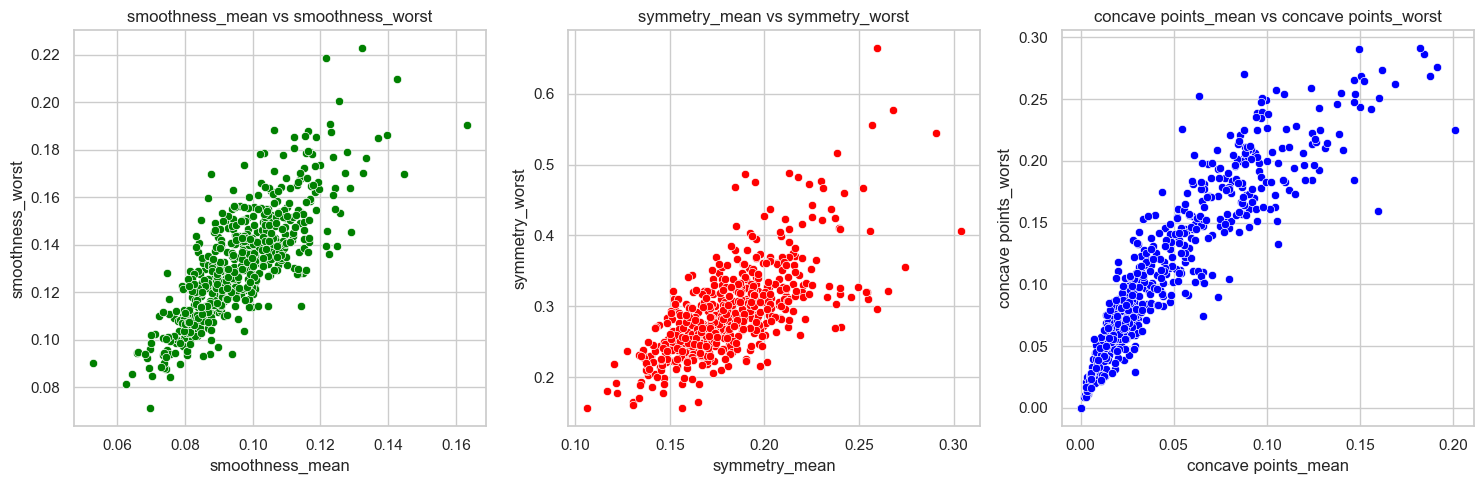

In [31]:
sns.set(style="whitegrid")
fig,axes=plt.subplots(1, 3,  figsize=(15,5))

sns.scatterplot(x="smoothness_mean",y="smoothness_worst",data=df,ax=axes[0], color="green")
axes[0].set_title("smoothness_mean vs smoothness_worst") 
axes[0].set_xlabel("smoothness_mean")
axes[0].set_ylabel("smoothness_worst")


sns.scatterplot(x="symmetry_mean",y="symmetry_worst",data=df,ax=axes[1], color="red")
axes[1].set_title("symmetry_mean vs symmetry_worst") 
axes[1].set_xlabel("symmetry_mean")
axes[1].set_ylabel("symmetry_worst")


sns.scatterplot(x="concave points_mean",y="concave points_worst",data=df,ax=axes[2], color="blue")
axes[2].set_title("concave points_mean vs concave points_worst") 
axes[2].set_xlabel("concave points_mean")
axes[2].set_ylabel("concave points_worst")

plt.tight_layout()
plt.show()

In [32]:
df.drop(["smoothness_worst","symmetry_worst","concave points_mean","texture_worst","area_worst"],axis=1,inplace=True)

In [33]:
x=df.drop(["diagnosis"],axis=1)
y=df["diagnosis"]
x

,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,compactness_worst,concavity_worst,concave points_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.27760,0.30010,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.66560,0.7119,0.2654,0.11890
1,17.77,1326.0,0.08474,0.07864,0.08690,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.18660,0.2416,0.1860,0.08902
2,21.25,1203.0,0.10960,0.15990,0.19740,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.42450,0.4504,0.2430,0.08758
3,20.38,386.1,0.14250,0.28390,0.24140,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.86630,0.6869,0.2575,0.17300
4,14.34,1297.0,0.10030,0.13280,0.19800,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.20500,0.4000,0.1625,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,1479.0,0.11100,0.11590,0.24390,0.1726,0.05623,1.2560,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,0.21130,0.4107,0.2216,0.07115
565,28.25,1261.0,0.09780,0.10340,0.14400,0.1752,0.05533,2.4630,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,0.19220,0.3215,0.1628,0.06637
566,28.08,858.1,0.08455,0.10230,0.09251,0.1590,0.05648,1.0750,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,0.30940,0.3403,0.1418,0.07820
567,29.33,1265.0,0.11780,0.27700,0.35140,0.2397,0.07016,1.5950,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,0.86810,0.9387,0.2650,0.12400


In [34]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [35]:
from sklearn.preprocessing import  StandardScaler

scl =StandardScaler()
x_scaled = scl.fit_transform(x)

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=.2,random_state=42)

In [47]:
from sklearn.linear_model import LogisticRegression

In [58]:
logistic = LogisticRegression()

logistic.fit(x_train,y_train)
logistic_score=round(logistic.score(x_train,y_train)*100.2)
print("Accuracy for the logistic model is" , logmodel_score)

Accuracy for the logistic model is 98


In [49]:
from sklearn.tree import DecisionTreeClassifier

decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
decision_tree_score=round(decision_tree.score(x_train,y_train)*100.2)
print("Accuracy for the decisiontree model is" , decision_tree_score)

Accuracy for the decisiontree model is 100


In [50]:
from sklearn.ensemble import RandomForestClassifier

randomforest=RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=0)
randomforest.fit(x_train,y_train)
randomforest_score=round(randomforest.score(x_train,y_train)*100.2)
print("Accuracy for the randomforest model is" , randomforest_score)

Accuracy for the randomforest model is 100


In [51]:
from sklearn.svm import SVC

svc=SVC(kernel="rbf",random_state=0)
svc.fit(x_train,y_train)
svc_score=round(svc.score(x_train,y_train)*100.2)
print("Accuracy for the svc model is" , svc_score)

Accuracy for the svc model is 98


In [52]:
from sklearn.naive_bayes import GaussianNB

gaussiannb=GaussianNB()
gaussiannb.fit(x_train,y_train)
gaussiannb_score=round(gaussiannb.score(x_train,y_train)*100.2)
print("Accuracy for the gaussiannb model is" , gaussiannb_score)


Accuracy for the gaussiannb model is 92


In [53]:
from sklearn.neighbors import KNeighborsClassifier

Kneighbors=KNeighborsClassifier(n_neighbors=2,metric="euclidean", p=2)
Kneighbors.fit(x_train,y_train)
Kneighbors_score=round(Kneighbors.score(x_train,y_train)*100.2)
print("Accuracy for the Kneighbors model is" , Kneighbors_score)

Accuracy for the Kneighbors model is 97


In [56]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
adaboost.fit(x_train,y_train)
adaboost_score=round(adaboost.score(x_train,y_train)*100.2)
print("Accuracy for the adaboost model is" , adaboost_score)

Accuracy for the adaboost model is 100


In [61]:
ssm= pd.DataFrame({"Algorithms": ["logistic","decision_tree","randomforest","svc","gaussiannb","Kneighbors","adaboost"],
                  "Acuracy rate": [logistic_score,decision_tree_score,randomforest_score,svc_score,gaussiannb_score,Kneighbors_score,adaboost_score]})
ssm.sort_values(by="Acuracy rate",ascending=False)

,Algorithms,Acuracy rate
1,decision_tree,100
2,randomforest,100
6,adaboost,100
0,logistic,98
3,svc,98
5,Kneighbors,97
4,gaussiannb,92


In [62]:
predict=adaboost.predict(x_test)

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=["predicted no","predicted yes"],index=["actual no","actual yes"])

,predicted no,predicted yes
actual no,69,2
actual yes,2,41


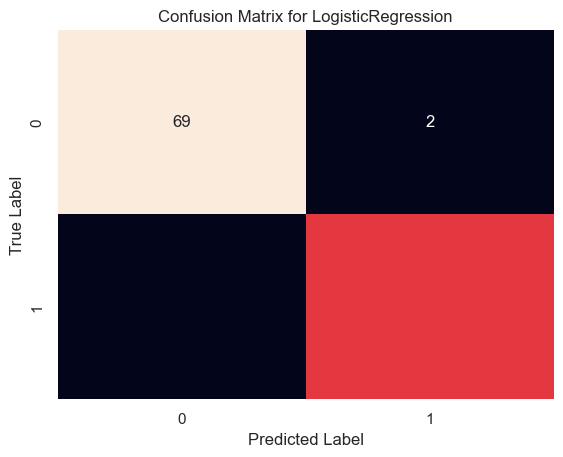

In [76]:
confu_matrix = confusion_matrix(y_test,predict)
sns.heatmap(confu_matrix, annot=True,fmt='d',cbar= False)
plt.title('Confusion Matrix for LogisticRegression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [77]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

